# 文本分析的基本概念

近些年，随着算力和数据的逐渐积累，人们越来越多的关注文本，比如新闻、上市公司公告、国家机构公告等，这些文本中包含了大量的信息可以被挖掘。在经济学、金融学、会计学等领域，也有很多文献开始从文本数据中提取数据，与传统的统计、计量经济学等工具相结合，解决经济学中的问题。比如，Gentzkow, Kelly和Taddy（2017）就提供了一个使用文本作为数据的一个综述。使用文本分析的研究课题也越来越广，比如：

* 政策不确定性：Baker, Blom和Davis（2016）；Benguria等（2022）
* 政治/媒体倾向：Piotroski, Wong和Zhang（2017）；Gentzkow和Shapiro（2010）
* 宏观经济：林建浩等（2021）
* 公司金融、公司治理：罗进辉（2018）；汝毅、薛健和张乾（2019）；王雄元和高曦（2018）
* 金融市场：阮睿等（2021）；Born, Ehrmann和Fratzscher（2014）
* 股票价格、波动率

而文本分析的方法也多种多样，比如：

* 直接使用Baidu、Google的搜索指数，比如罗进辉（2018）
* 从文本中找到相关词汇，比如山立威、甘犁和郑涛（2008）
* 使用词频（或者TF-IDF），比如Piotroski, Wong和Zhang（2017）
* 使用字符串长度，比如王雄元和高曦（2018）
* 基于词典，比如阮睿等（2021）；Gentzkow和Shapiro（2010）;姚加权等（2021）
* 情感分析，比如汝毅、薛健和张乾（2019）
* 机器学，比如林建浩等（2021）

与我们之前介绍的分析不同，文本数据是典型的非结构化数据，而且本身具有非常复杂的结构，相对之前的数据分析相比有其特有的分析技巧。这里我们将简单介绍文本分析的基本流程以及一些基础的工具。

虽然差别很大，但是基本流程与之前的分析还是想通的，一般都需要如下步骤：

1. 准备数据，在这一步除了要准备需要进行分析的数据之外，可能还需要准备额外的语料库（corpus）。
2. 文本规范化处理，也就是我们之前清洗数据的步骤，比如分词、去除停用词、去除特殊符号等无意义字符、同义词转换、缩写转换等等。
3. 特征工程，从已经清洗好的数据中提取特征。由于计算机只能处理数值型的变量，因而在这一步有一个比较关键的步骤是将文字转换为计算机可以理解的向量等数值型变量。
4. 训练模型，经过这些步骤后，针对不同的目的，模型训练可能与之前的算法比较类似，但是也有针对文本数据特有的模型。
5. 模型评价，评价模型的性能，重复以上步骤，改进模型。这一步有时涉及到人工评价模型，比如使用词典的方法就非常需要人口去查验效果。这一步非常关键，比如Baker, Blom和Davis（2016）就提供了人工查验数据的一个很好范例。

针对文本数据，除了其他数据同样可以进行的相关性计算、聚类、分类等模型之外，还有一些任务是文本数据特有的，比如：

* 分词
* 词性标注
* 词嵌入
* 摘要和主题建模
* 实体识别
* 知识图谱
* 语义分析
* ......

其中有的模型结果是其他模型的基础，比如分词、词性标注等是很多其他模型的基础。

在本节，我们将主要使用Python中的**NLTK**（http://www.nltk.org ）、**Scikit-Learn**、**Jieba**（https://github.com/fxsjy/jieba ）、**Gensim**（https://github.com/RaRe-Technologies/gensim ）等工具介绍文本分析的基本原理。不过与此同时，自然语言处理，包括中文的自然语言处理正在蓬勃发展，很多新的工具可以使用，比如对标NLTK并且号称有更好性能的**spaCy**（ https://spacy.io ），以及已经经过预训练可以直接拿来用的模型比如最近如火如荼的**BERT**、**HanLP**（https://github.com/hankcs/HanLP ）、**Stanford CoreNLP**（https://github.com/stanfordnlp/CoreNLP ）等等，学习基本原理后可以直接使用这些包进行自己的研究。

在这里我们从文本的规范化处理开始，介绍文本分析的基本原理和方法。

此外，在这里可以提供一些文本分析、自然语言处理的比较好的学习资料：

1. Anand, V., Bochkay, K., Chychyla, R., & Leone, A. J. (2020). Using Python for text analysis in accounting research. Vic Anand, Khrystyna Bochkay, Roman Chychyla and Andrew Leone (2020)," Using Python for Text Analysis in Accounting Research", Foundations and Trends®in Accounting, 14(3–4), 128–359.
2. Sarkar, D. (2016). Text Analytics with python. Springer. （中文版：《Python文本分析》）

**参考文献**
1. Anand, V., Bochkay, K., Chychyla, R., & Leone, A. J. (2020). Using Python for text analysis in accounting research (Vol. 14, Issues 3–4).
2. Baker, S. R., Bloom, N., & Davis, S. J. (2016). Measuring economic policy uncertainty. The Quarterly Journal of Economics, 131(4), 1593–1636.
3. Benguria, F., Choi, J., Swenson, D. L., & Xu, M. J. (2022). Anxiety or pain? The impact of tariffs and uncertainty on Chinese firms in the trade war. Journal of International Economics, 103608.
4. Born, B., Ehrmann, M., & Fratzscher, M. (2014). Central bank communication on financial stability. The Economic Journal, 124(577), 701–734.
5. Gentzkow, M., Kelly, B., & Taddy, M. (2019). Text as data. Journal of Economic Literature, 57(3), 535–574.
6. Gentzkow, M., & Shapiro, J. M. (2010). What drives media slant? Evidence from US daily newspapers. Econometrica, 78(1), 35–71.
7. Piotroski, J. D., Wong, T. J., & Zhang, T. (2017). Political bias in corporate news: The role of conglomeration reform in China. The Journal of Law and Economics, 60(1), 173–207.
8. 林建浩,陈良源,罗子豪,张一帆.央行沟通有助于改善宏观经济预测吗?——基于文本数据的高维稀疏建模[J].经济研究,2021,56(03):48-64.
9. 罗进辉. 媒体报道与高管薪酬契约有效性[J]. 金融研究, 2018, 453(3): 190-206.
10. 阮睿, 孙宇辰, 唐悦, 等. 资本市场开放能否提高企业信息披露质量?——基于 “沪港通” 和年报文本挖掘的分析[J]. 金融研究, 2021, 488(2): 188-206.
11. 汝毅, 薛健, 张乾. 媒体新闻报道的声誉溢出效应[J]. 金融研究, 2019, 470(8): 189-206.
12. 山立威, 甘犁, 郑涛. 公司捐款与经济动机[J]. 经济研究, 2008, 11: 51-60.
13. 王雄元, 高曦. 年报风险披露与权益资本成本[J]. 金融研究, 2018, 451(1): 174-190.
14. 姚加权, 冯绪, 王赞钧, 纪荣嵘, & 张维. (2021). 题名: 语调、情绪及市场影响:基于金融情绪词典. 管理科学学报, 24(5), 26–46.


# 文本规范化

文本是典型的非结构化数据，我们需要将文本转换为高度结构化的数据，首先要对文本进行有意义的划分，一般涉及到句子的**切分**（**tokenization**）以及其他清洗步骤。

**标识**（**token**）是文本的有意义的最小成分，文本处理的最简单操作即将文本切成一个个的token，通常包括句子切分和词语切分。接下来我们很少有研究句子的成分和语义，更多时候是针对词语的分析，因而接下来主要介绍句子的切分方法。

## 英文切分

英文的词语切分一般比较简单，主要原因是因为英文的单词之间都有空格进行分割，而中文的切分就复杂很多。常见的自然语言处理包比如NKTL以及spaCy都肯定包含了切分的函数，比如在NLTK中：

In [1]:
sentence = "I am working very hard to help New York City & State. Dealing with both Mayor & Governor and producing tremendously for them, including four new medical centers and four new hospitals. Fake News that I won’t help them because I don’t like Cuomo (I do). Just sent 4000 ventilators!"
sentence

'I am working very hard to help New York City & State. Dealing with both Mayor & Governor and producing tremendously for them, including four new medical centers and four new hospitals. Fake News that I won’t help them because I don’t like Cuomo (I do). Just sent 4000 ventilators!'

In [2]:
from nltk import word_tokenize

words = word_tokenize(sentence)
print(words)

['I', 'am', 'working', 'very', 'hard', 'to', 'help', 'New', 'York', 'City', '&', 'State', '.', 'Dealing', 'with', 'both', 'Mayor', '&', 'Governor', 'and', 'producing', 'tremendously', 'for', 'them', ',', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals', '.', 'Fake', 'News', 'that', 'I', 'won', '’', 't', 'help', 'them', 'because', 'I', 'don', '’', 't', 'like', 'Cuomo', '(', 'I', 'do', ')', '.', 'Just', 'sent', '4000', 'ventilators', '!']


注意运行以上命令可能先要下载相应的包：在Python解释器中运行：nltk.download('punkt') ，如果提示错误，可以参考：https://www.cnblogs.com/sddai/p/10543359.html

当然NLTK不止支持这一种切分方法，比如我们可以使用正则表达式切分：

In [3]:
from nltk import RegexpTokenizer

Tokenizer = RegexpTokenizer(pattern=r"[\w\-’']+")
words = Tokenizer.tokenize(sentence)
print(words)

['I', 'am', 'working', 'very', 'hard', 'to', 'help', 'New', 'York', 'City', 'State', 'Dealing', 'with', 'both', 'Mayor', 'Governor', 'and', 'producing', 'tremendously', 'for', 'them', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals', 'Fake', 'News', 'that', 'I', 'won’t', 'help', 'them', 'because', 'I', 'don’t', 'like', 'Cuomo', 'I', 'do', 'Just', 'sent', '4000', 'ventilators']


此外还可以使用空白字符（空格、缩进、换行）等进行切分：

In [4]:
from nltk import WhitespaceTokenizer

Tokenizer = WhitespaceTokenizer()
words = Tokenizer.tokenize(sentence)
print(words)

['I', 'am', 'working', 'very', 'hard', 'to', 'help', 'New', 'York', 'City', '&', 'State.', 'Dealing', 'with', 'both', 'Mayor', '&', 'Governor', 'and', 'producing', 'tremendously', 'for', 'them,', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals.', 'Fake', 'News', 'that', 'I', 'won’t', 'help', 'them', 'because', 'I', 'don’t', 'like', 'Cuomo', '(I', 'do).', 'Just', 'sent', '4000', 'ventilators!']


英文分词虽然原理简单，但是还是有很多细节的坑，比如上面Trump先生的「don’t」和「don't」，如果在切分或者其他清洗步骤中予以重视，计算机会认为这是两个词。

## 中文分词

中文文本分析与英文的文本分析一个最重要的区别在于，英文使用空格分割每个单词，但是中文没有分割单词的概念。

为了克服这个问题，分词就应运而生了。结合字典和算法，分词软件可以帮助我们将中文的文章、句子分解为一个个的中文单词。

目前已经有很多成熟的分词工具，比如中科院的NLPIR汉语分词系统、结巴分词以及腾讯、阿里、百度的分词系统等等。在这里我们以开源的结巴分词为例，介绍分词工具的用法。

为了使用结巴分词，首先需要安装。在terminal中输入：
```shell
pip install jieba
```

就可以进行安装了。安装好之后，可以将jieba模块导入到Python程序中，就可以正常使用了：
```shell
import jieba
```

比如，最简单的用法：

In [5]:
import jieba

line = "今年以来，我国持续推进减税降费、提高最低工资标准、促进就业，特别是年初开始实施的个人所得税改革以及专项附加扣除方案，有效增加了居民可支配收入。与此同时，不断消除居民消费的后顾之忧。消费需求进一步释放，消费市场亮点纷呈"
wlist = jieba.cut(line)
print(list(wlist))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.317 seconds.
Prefix dict has been built successfully.


['今年以来', '，', '我国', '持续', '推进', '减税', '降费', '、', '提高', '最低工资', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可', '支配', '收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费', '需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


cut()函数有三个参数：必须要提供的是需要进行分词的字符串；此外，cut_all参数控制是否采用全模式；HMM参数用来控制是否使用HMM模型。其区别是：

* cut_all=True， 代表使用全模式，全模式可以切出混合不同粒度的词
* HMM=True，代表使用HMM模型，用于推断字典中没有的词

比如：

In [6]:
wlist = jieba.cut(line, cut_all=True)
print(list(wlist))

['今年', '今年以来', '以来', '，', '我国', '持续', '推进', '减税', '降', '费', '、', '提高', '最低', '最低工资', '低工资', '工资', '工资标准', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人', '个人所得', '个人所得税', '所得', '所得税', '税改', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配', '支配', '收入', '。', '与此', '与此同时', '同时', '，', '不断', '消除', '居民', '居民消费', '消费', '的', '后顾之忧', '。', '消费', '需求', '求进', '进一步', '一步', '释放', '，', '消费', '消费市场', '市场', '亮点', '纷呈']


In [7]:
wlist = jieba.cut(line, HMM=True)
print(list(wlist))

['今年以来', '，', '我国', '持续', '推进', '减税', '降费', '、', '提高', '最低工资', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可', '支配', '收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费', '需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


In [8]:
wlist = jieba.cut(line, HMM=True, cut_all=True)
print(list(wlist))

['今年', '今年以来', '以来', '，', '我国', '持续', '推进', '减税', '降', '费', '、', '提高', '最低', '最低工资', '低工资', '工资', '工资标准', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人', '个人所得', '个人所得税', '所得', '所得税', '税改', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配', '支配', '收入', '。', '与此', '与此同时', '同时', '，', '不断', '消除', '居民', '居民消费', '消费', '的', '后顾之忧', '。', '消费', '需求', '求进', '进一步', '一步', '释放', '，', '消费', '消费市场', '市场', '亮点', '纷呈']


可以看到，上面的分词结果......一言难尽。实际上，任何分词算法都不可避免的不能跟上时代的潮流，特别是网络时代，新的词语层出不穷，而在一些专业领域中，一些专有名词往往普通词典无法完全覆盖。比如“减费降税”、“可支配收入”这些专有名词，都没有被正确分出来。

为了克服这个问题，往往需要用户自己添加字典。比如，我们可以把“减费降税”、“可支配收入”这些名词放在一个文本文件中，每个新词写成一行，然后使用load_userdict()函数给定这个文件，就可以添加自己的新词列表：

In [9]:
with open('user_dict.txt', 'wt') as f:
    f.write("减税降费\n可支配收入\n最低工资\n最低工资标准\n专项附加扣除\n消费需求")
jieba.load_userdict('user_dict.txt')
wlist = jieba.cut(line)
print(list(wlist))

['今年以来', '，', '我国', '持续', '推进', '减税降费', '、', '提高', '最低工资标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项附加扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


载入了用户字典后，新的分词更加准确了。在实际应用的时候，无论使用什么分词工具，用户字典的构建往往是非常关键的。

## 大小写转换

主要针对英文等字母文字，一般的做法是统一转换为小写字母，避免出现「FAKE NEWS$\neq$fake news」的情况出现。可以使用字符串的.lower()方法很容易的完成大小写转换：

In [10]:
words = [w.lower() for w in words]
print(words)

['i', 'am', 'working', 'very', 'hard', 'to', 'help', 'new', 'york', 'city', '&', 'state.', 'dealing', 'with', 'both', 'mayor', '&', 'governor', 'and', 'producing', 'tremendously', 'for', 'them,', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals.', 'fake', 'news', 'that', 'i', 'won’t', 'help', 'them', 'because', 'i', 'don’t', 'like', 'cuomo', '(i', 'do).', 'just', 'sent', '4000', 'ventilators!']


## 删除停用词和特殊字符

分词之后，在进一步进行处理之前，消除停用词和特殊符号往往是非常关键的。比如在上面的分词结果中，“的”、“是”、“与此同时”等，含义并不是非常明显，对其分析的意义不大，留着这些词只会空占内存，并且可能对分析结果产生巨大影响。一个常用的做法是，使用一个停用词列表，分词结束之后，把停用词列表中的词全都剔除出去。

比如，在文本文档“Chinese/stopword.txt”中，我们列举出了一些常用的停用词以及特殊字符，我们可以使用如下方法消除停用词：

In [11]:
with open('Chinese/stopword.txt', 'rt') as f:
    stoplist = f.readlines()
    stoplist = set([w.lower() for w in stoplist])
wlist = jieba.cut(line)
wlist = [w.lower() for w in wlist if w.lower() not in stoplist]
print(wlist)

['今年以来', '，', '我国', '持续', '推进', '减税降费', '、', '提高', '最低工资标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项附加扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


注意上面的函数里面我们还同时对停用词和词语转换为了小写。

## 扩展缩写词、同义词转换

缩写词即诸如：「isn't==is not」之类的缩写，一般而言也需要特殊处理。一般来说我们可以通过定义一个映射关系来处理这种情况，比如：

In [12]:
syno = {
    "isn't": "is not",
    "aren't": "are not",
    "i'll": "i will",
    "个人所得税": "个税"
}
wlist = [syno[w] if w in syno.keys() else w for w in wlist]
print(wlist)

['今年以来', '，', '我国', '持续', '推进', '减税降费', '、', '提高', '最低工资标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个税', '改革', '以及', '专项附加扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


此外，还有一些更加细致的工作，比如检查拼写错误、矫正重复字符等等，这些都需要大量细致的工作，特别是针对不同的应用场景进行特定的优化是非常有必要的。

而对于英文，由于英文存在时态、单复数的问题，一个常见的操作是使用stemmer算法将其转化为词根，比如economics, economically, economic等都代表同一个词，所以可以使用相同的词根来表示。对于英文，比较常见的算法是所谓的Porter Stemmer，在NLTK中可以直接调用：

In [13]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
print(porter.stem('economically'))
print(porter.stem('economics'))
print(porter.stem('economic'))

econom
econom
econom


如此我们就有了三个词的共同词根：econom。使用stemmer可以极大的减少词的个数，从而达到降维的目的。比如对于以上英文，我们可以先分词、转化大小写再进行stem操作：

In [14]:
words = [porter.stem(w).lower() for w in word_tokenize(sentence)]
print(words)

['i', 'am', 'work', 'veri', 'hard', 'to', 'help', 'new', 'york', 'citi', '&', 'state', '.', 'deal', 'with', 'both', 'mayor', '&', 'governor', 'and', 'produc', 'tremend', 'for', 'them', ',', 'includ', 'four', 'new', 'medic', 'center', 'and', 'four', 'new', 'hospit', '.', 'fake', 'new', 'that', 'i', 'won', '’', 't', 'help', 'them', 'becaus', 'i', 'don', '’', 't', 'like', 'cuomo', '(', 'i', 'do', ')', '.', 'just', 'sent', '4000', 'ventil', '!']


而对于中文，同样也可以进行同义词的转换步骤，如果需要，https://github.com/fighting41love/funNLP/tree/master/data 中提供了一个可用的近义词表。

## 一个简单的例子：中文词频统计

以下实现了对《越女剑》的词频统计：

In [15]:
import jieba

## 停用词
with open('Chinese/stopword.txt', 'rt') as f:
    stoplist = f.readlines()
    stoplist = [w.lower().strip() for w in stoplist]
## 读入小说
wordlist = []
with open('Chinese/越女剑.txt', 'rt') as f:
    for l in f:
        line_cut = jieba.cut(l)
        line = [w.strip().lower() for w in line_cut]
        wordlist.extend(line)
wordlist = [w.lower() for w in wordlist if w.lower() not in stoplist]
## 统计
text_dict = dict()
for l in wordlist:
    if l not in text_dict:
        text_dict[l] = 1
    else:
        text_dict[l] += 1
text_freq = []
for k in text_dict:
    text_freq.append((k, text_dict[k]))
## 排序
text_freq.sort(key=lambda x: x[1], reverse=True)
## 用pandas显示，更好看
import pandas as pd

freq = pd.DataFrame(text_freq, columns=['word', 'frequency'])
freq.head(10)

,word,frequency
0,范蠡,118
1,道,113
2,剑士,105
3,青衣,47
4,阿青,47
5,勾践,44
6,锦衫,35
7,长剑,34
8,说道,31
9,吴国,30


# 词典与词频的结合

我们可以将词典与词频相结合，构造一些需要的指标。比如Benguria等（2022）就使用了类似的方法研究贸易政策不确定性。

这里，作为示例，我们仿照Benguria等（2022）的方法，使用（部分）金融新闻的标题数据，构造一个宏观政策不确定性的指数。

在Benguria等（2022），他们使用了两个不同的词典：
* 贸易政策词典：国际贸易、出口、进口、关税、壁垒、反倾销、外包、保护主义、单边主义
* 不确定性词典：不确定、不明确、不明朗、未明、（不明）、难料、难以估计、难以预计、难以预测、难以预料、风险、危险、危机、威胁、未知

我们仿照他们的做法，不过选择一个与宏观经济政策有关的词典：
* 宏观政策词典：政策、宏观、货币、财政、土地

Benguria等（2022）使用了完整的报告，我们这里暂时只用标题。

首先导入数据：

In [16]:
import pandas as pd

StockNews = pd.read_csv("csv/stocknews1.csv")
StockNews['date'] = pd.to_datetime(StockNews['date'])
jianbao = StockNews['title'].str.match(
    r'(.+\d{4}年\d{2}月\d{2}日.+简报|.*二级市场.*简报|.*业绩公报.*|.*登记日期.*|.*交易安排表.*)')
StockNews = StockNews[~jianbao]
StockNews.head()

,id,date,title
0,59021767,2011-02-19,沪争取增值税扩围改革试点
1,59021769,2011-02-19,周小川：外部施压不会影响人民币升值步伐
2,59021771,2011-02-19,准备金率再上调 达到19.5％创新高
4,59021774,2011-02-19,定基价格指数若涨20% 政府或出手调控
5,59021776,2011-02-19,政策倾斜和加大投入 西藏将做大做强藏药产业


接下来定义模式，如果在句子中同时存在不确定性词典的词，以及宏观政策词典的词，那么就认为这是一条关于宏观政策不确定新的标题，具体做法可以使用正则表达式：

In [17]:
uncertainty_dict = [
    "不确定", "不明确", "不明朗", "未明", "不明", "难料", "难以估计", "难以预计", "难以预测", "难以预料",
    "风险", "危险", "危机", "威胁", "未知"
]
macro_dict = ["政策", "宏观", "货币", "财政", "土地", "经济", "改革", "中国"]

uncertainty_dict=['.*'+d+'.*' for d in uncertainty_dict]
macro_dict=['.*'+d+'.*' for d in macro_dict]
uncertainty_re = "(" + '|'.join(uncertainty_dict) + ")"
macro_re = "(" + '|'.join(macro_dict) + ")"
print(uncertainty_re)
print(macro_re)

StockNews['uncertainty'] = StockNews['title'].str.match(uncertainty_re)
StockNews['macro'] = StockNews['title'].str.match(macro_re)
StockNews['macro_uncertainty'] = StockNews['uncertainty'] & StockNews['macro']
StockNews['macro_uncertainty'].sum()

(.*不确定.*|.*不明确.*|.*不明朗.*|.*未明.*|.*不明.*|.*难料.*|.*难以估计.*|.*难以预计.*|.*难以预测.*|.*难以预料.*|.*风险.*|.*危险.*|.*危机.*|.*威胁.*|.*未知.*)
(.*政策.*|.*宏观.*|.*货币.*|.*财政.*|.*土地.*|.*经济.*|.*改革.*|.*中国.*)


2612

接下来我们根据年份对不确定性进行一个加总：

In [18]:
StockNews['year'] = pd.DatetimeIndex(StockNews['date']).year
aggregate_index = StockNews[['year',
                             'macro_uncertainty']].groupby('year').sum()
aggregate_index['count'] = StockNews[['year', 'macro_uncertainty'
                                      ]].groupby('year').count()
aggregate_index['ratio'] = aggregate_index['macro_uncertainty'] / (
    100 + aggregate_index['count']) * 1000
aggregate_index

,macro_uncertainty,count,ratio
year,,,
1900,0,41,0.000000
1986,0,1,0.000000
1992,0,1,0.000000
1993,0,13,0.000000
1994,0,16,0.000000
1995,0,33,0.000000
1996,0,38,0.000000
1997,0,44,0.000000
1998,0,30,0.000000


# 提取特征

由于计算机只能处理数值变量进行运算，在文本数据清洗完毕后，接下来通常需要将其转换为计算机可以识别的向量。目前有多重方法可以完成这项任务，我们在这里主要介绍其中常见的三种：词袋、TF-IDF以及词嵌入三种模型。

## 词袋模型

**词袋**（**bag of words**）模型是最基础的一种将文本数据结构化为向量的一种方法。实际上词袋可以简单理解为每个文本的词频统计。比如，我们接下来使用一些上市公司的标题数据，并使用上面介绍的方法将每个标题转换为向量：

In [19]:
RAW = pd.read_csv("csv/stocknews1.csv")
RAW['date'] = pd.to_datetime(RAW['date'])
RAW.head(10)

,id,date,title
0,59021767,2011-02-19,沪争取增值税扩围改革试点
1,59021769,2011-02-19,周小川：外部施压不会影响人民币升值步伐
2,59021771,2011-02-19,准备金率再上调 达到19.5％创新高
3,59021772,2011-02-19,浙江亚太药业股份有限公司股票2011年02月14日2011年02月18日二级市场表现周简报
4,59021774,2011-02-19,定基价格指数若涨20% 政府或出手调控
5,59021776,2011-02-19,政策倾斜和加大投入 西藏将做大做强藏药产业
6,59021778,2011-02-19,新疆13个地州探矿权年 590个项目涉嫌“圈而不探”
7,59021779,2011-02-19,沪士电子股份有限公司股票2011年02月14日2011年02月18日二级市场表现周简报
8,59021783,2011-02-19,北京：楼市限购首日成交环比降9成
9,59021787,2011-02-19,上海：房管局发布“沪九条”限购执行细则


这里我们额外进行一些处理，注意到其中的类似「2011年02月14日2011年02月18日二级市场表现周简报」之类的title很没有营养，我们打算去除他，可以使用正则表达式方便的达到目的：

In [20]:
jianbao = RAW['title'].str.match(r'(.+\d{4}年\d{2}月\d{2}日.+简报|.*二级市场.*简报|.*业绩公报.*|.*登记日期.*|.*交易安排表.*)')
RAW1 = RAW.iloc[list(~jianbao), :]
RAW1

,id,date,title
0,59021767,2011-02-19,沪争取增值税扩围改革试点
1,59021769,2011-02-19,周小川：外部施压不会影响人民币升值步伐
2,59021771,2011-02-19,准备金率再上调 达到19.5％创新高
4,59021774,2011-02-19,定基价格指数若涨20% 政府或出手调控
5,59021776,2011-02-19,政策倾斜和加大投入 西藏将做大做强藏药产业
...,...,...,...
1134769,19839999,2006-12-27,定价基准不同 新利率基准将冲击旧浮动利率债
1134770,19840000,2006-12-27,债市延续调整格局 投资者宜缩短投资久期
1134771,19840023,2006-12-27,曾培炎:利用外汇储备优势
1134772,19840026,2006-12-27,广州小时最低工资标准7.5元


为了方便起见，我们选取其中的前十条先进行分析：

In [21]:
data = RAW1.iloc[:10, :]
data

,id,date,title
0,59021767,2011-02-19,沪争取增值税扩围改革试点
1,59021769,2011-02-19,周小川：外部施压不会影响人民币升值步伐
2,59021771,2011-02-19,准备金率再上调 达到19.5％创新高
4,59021774,2011-02-19,定基价格指数若涨20% 政府或出手调控
5,59021776,2011-02-19,政策倾斜和加大投入 西藏将做大做强藏药产业
6,59021778,2011-02-19,新疆13个地州探矿权年 590个项目涉嫌“圈而不探”
8,59021783,2011-02-19,北京：楼市限购首日成交环比降9成
9,59021787,2011-02-19,上海：房管局发布“沪九条”限购执行细则
10,59021789,2011-02-19,6.5781！人民币升值容忍度继续提高？
11,59021791,2011-02-19,2010年上海商品住宅销售降四成


In [22]:
## 首先进行分词、去除停用词等
import jieba

with open('Chinese/stopword.txt', 'rt') as f:
    stoplist = f.readlines()
    stoplist = [w.replace('\n', '') for w in stoplist]


def tokenize(w):
    cut_w = jieba.cut(w)
    ## 去除停用词
    cut_w = [
        w.strip().lower() for w in cut_w
        if w.strip().lower() not in stoplist and len(w.strip()) > 0
    ]
    return cut_w


tokenized_data = map(tokenize, data['title'])
tokenized_data = list(tokenized_data)
tokenized_data

[['沪', '增值税', '扩围', '改革', '试点'],
 ['周小川', '外部', '施压', '影响', '人民币', '升值', '步伐'],
 ['准备金率', '上调', '19.5', '创新', '高'],
 ['定基', '价格指数', '若涨', '20%', '政府', '出手', '调控'],
 ['政策', '倾斜', '加大', '投入', '西藏', '做', '做', '强', '藏药', '产业'],
 ['新疆', '地州', '探矿权', '590', '项目', '涉嫌', '圈', '不探'],
 ['北京', '楼市', '限购', '首日', '成交', '环', '比降', '成'],
 ['上海', '房管局', '发布', '沪', '九条', '限购', '执行', '细则'],
 ['6.5781', '人民币', '升值', '容忍度', '提高'],
 ['2010', '上海', '商品住宅', '销售', '降', '四成']]

In [23]:
## 接下来进行词频统计


def word_freq(wlist):
    freq = {}
    for w in wlist:
        if w in freq:
            freq[w] += 1
        else:
            freq[w] = 1

    return freq


freqs = map(word_freq, tokenized_data)
## 放在pandas里
pd_freqs = pd.DataFrame(freqs)
## 把NaN换成0
pd_freqs = pd_freqs.fillna(0)
pd_freqs.head(10)

,沪,增值税,扩围,改革,试点,周小川,外部,施压,影响,人民币,...,执行,细则,6.5781,容忍度,提高,2010,商品住宅,销售,降,四成
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


如此，一个简单的词袋模型就完成了。

不过，可以看到虽然我们只有10条新闻，这个矩阵已经很大了。如果10万条新闻一起来，不仅词（列）多，而且行也多，最终这个矩阵的规模会变的非常巨大，甚至可能很轻易的会占满内存。

然而注意到，这个矩阵里面多数的值都是0，这种类型的矩阵我们成为**稀疏矩阵**（**sparse matrix**），在SciPy和Pandas里面都提供了稀疏矩阵的存储结构和运算，所以更好的办法是使用稀疏矩阵进行存储：

In [24]:
sparse_freqs = pd_freqs.astype(pd.SparseDtype("float", 0))
sparse_freqs.head(10)

,沪,增值税,扩围,改革,试点,周小川,外部,施压,影响,人民币,...,执行,细则,6.5781,容忍度,提高,2010,商品住宅,销售,降,四成
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


上面的意思是通过类型转换，把数据框转换为稀疏类型，其中的「0」就不存储了，虽然看起来没有变化，但是如果我们查看类型：

In [25]:
sparse_freqs.dtypes

沪       Sparse[float64, 0]
增值税     Sparse[float64, 0]
扩围      Sparse[float64, 0]
改革      Sparse[float64, 0]
试点      Sparse[float64, 0]
               ...        
2010    Sparse[float64, 0]
商品住宅    Sparse[float64, 0]
销售      Sparse[float64, 0]
降       Sparse[float64, 0]
四成      Sparse[float64, 0]
Length: 63, dtype: object

会发现都变成了Sparse的float64类型，且0不存储。

不过，如果使用稀疏类型，那么隐式索引将不能使用：

In [26]:
try:
    print(sparse_freqs.iloc[0,:])
except Exception as e:
    print("错误：",e)

错误： SparseArray does not support item assignment via setitem


如果需要使用隐式索引，需要使用：

In [27]:
print(sparse_freqs.sparse.to_dense().iloc[0,:])

沪       1.0
增值税     1.0
扩围      1.0
改革      1.0
试点      1.0
       ... 
2010    0.0
商品住宅    0.0
销售      0.0
降       0.0
四成      0.0
Name: 0, Length: 63, dtype: float64


当然，以上是自己手写的词袋生成步骤，实际上很多自然语言处理包已经有比较成熟的词袋处理机制。比如在Scikit-Learn中已经准备好了词袋的提取函数：

In [28]:
import jieba

with open('Chinese/stopword.txt', 'rt') as f:
    stoplist = f.readlines()
    stoplist = [w.replace('\n', '') for w in stoplist]

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(tokenizer=jieba.cut,
                             stop_words=stoplist,
                             min_df=1)
bag_words = count_vect.fit_transform(data['title'])
words_names = count_vect.get_feature_names()
bag_words

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['##', 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'lex', 'll', 'm', 'mon', 'null', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '±', '÷', 'β', 'δ', 'λ', 'ξ', 'ψ', 'в', '′', '″', 'ⅲ', '∈', '∧', '∪', '─', '☆', '一会', '一关', '一城', '一堆', '一对', '一批', '一方', '一期', '一村', '一根', '一派', '一班', '一百', '一眼', '一科', '一群', '一遍', '一道', '一部', '一集', '一页', '一颗', '三鲜', '为什', '什', '倒', '傥', '元', '元素', '先', '关', '兼', '前', '单元', '吨', '唷', '啪', '啷', '喔', '喜欢', '外', '多年', '大节', '大道', '大面儿', '天', '始', '子弹', '後', '抗拒', '敞开', '新', '昉', '更远', '有意', '有趣', '末', '次', '毫无保留', '波', '漫', '特', '特别', '理', '皆', '目前为止', '笑', '第三', '第五', '第四', '策略', '讲', '设', '话', '说', '赶早', '赶晚', '达', '钱', '限', '非', '面', '题', '麽', 'ａ', 'ｂ', 'ｃ', 'ｄ', 'ｅ', 'ｆ', 'ｇ', 'ｈ', 'ｉ', 'ｊ', '

<10x64 sparse matrix of type '<class 'numpy.int64'>'
	with 72 stored elements in Compressed Sparse Row format>

注意由于Scikit-Learn中一般只支持英文的自动分词（tokenize），为了让他能够处理中文的分词，我们把jieba.cut函数提交给了CountVectorizer，此外还额外提供了停用词列表。min_df选项设置了如果在所有文本中某个词出现的频率下线，如果出现太少则会被忽略，适当提高这个选项可以降低维数。

上面的词袋结果是一个sparse matrix，实际上是SciPy中的系数矩阵形式，实际分析时已经可以使用。不过为了查看方便，我们不妨将其转换为Pandas的数据框（稀疏存储）：

In [29]:
bag_words_df = pd.DataFrame.sparse.from_spmatrix(bag_words,
                                                 columns=words_names)
bag_words_df.head(10)

,,19.5,20%,2010,590,6.5781,上海,上调,不探,九条,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


也许你会觉着不舒服的是，分词和去除停用词等操作应该是第二步清洗数据完成的，现在如果都放到向量化的对象CountVectorizer中来，非常不灵活。

比如显然上面的结果中，「13，19.5，20%」等都不是我们想要的，然而用停用词根本不可能将这些数字去除。

那么如何将两者（手工清洗+自动计算词袋）结合起来呢？其实很简单，用空格将他们join起来就好了。比如：

In [30]:
import jieba
import re

with open('Chinese/stopword.txt', 'rt') as f:
    stoplist = f.readlines()
    stoplist = [w.replace('\n', '') for w in stoplist]


def not_digit(w):
    w = w.replace(',', '')
    if re.match(r'\d+', w) != None or re.match(r'\d%', w) != None or re.match(
            r'\d*\.\d+', w) != None:
        return False
    else:
        return True


def tokenize(w):
    cut_w = jieba.cut(w)
    ## 去除停用词
    cut_w = [
        w.strip().lower() for w in cut_w
        if ((w.strip().lower() not in stoplist) and not_digit(w) and len(w.strip()) > 0)
    ]
    return cut_w


tokenized_data = map(tokenize, data['title'])
tokenized_data = [' '.join(t) for t in tokenized_data]
tokenized_data

['沪 增值税 扩围 改革 试点',
 '周小川 外部 施压 影响 人民币 升值 步伐',
 '准备金率 上调 创新 高',
 '定基 价格指数 若涨 政府 出手 调控',
 '政策 倾斜 加大 投入 西藏 做 做 强 藏药 产业',
 '新疆 地州 探矿权 项目 涉嫌 圈 不探',
 '北京 楼市 限购 首日 成交 环 比降 成',
 '上海 房管局 发布 沪 九条 限购 执行 细则',
 '人民币 升值 容忍度 提高',
 '上海 商品住宅 销售 降 四成']

In [31]:
count_vect = CountVectorizer()
bag_words = count_vect.fit_transform(tokenized_data)
words_names = count_vect.get_feature_names()
bag_words_df = pd.DataFrame.sparse.from_spmatrix(bag_words,
                                                 columns=words_names)
bag_words_df.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,准备金率,出手,...,细则,若涨,藏药,西藏,试点,调控,销售,限购,项目,首日
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


当然，更优雅的方法是直接将手写的tokenize函数调入即可：

In [32]:
count_vect = CountVectorizer(tokenizer=tokenize)
bag_words = count_vect.fit_transform(data['title'])
words_names = count_vect.get_feature_names()
bag_words_df = pd.DataFrame.sparse.from_spmatrix(bag_words,
                                                 columns=words_names)
bag_words_df.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,做,准备金率,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,2,0,...,1,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


实际上以上的词袋又被称为1元词袋，是N元（N-gram）词袋的一种特例。我们当然可以做成二元词袋：

In [33]:
count_vect = CountVectorizer(tokenizer=tokenize, ngram_range=(2, 2))
bag_words = count_vect.fit_transform(data['title'])
words_names = count_vect.get_feature_names()
bag_words_df = pd.DataFrame.sparse.from_spmatrix(bag_words,
                                                 columns=words_names)
bag_words_df.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,上海 商品住宅,上海 房管局,上调 创新,九条 限购,人民币 升值,价格指数 若涨,倾斜 加大,做 做,做 强,准备金率 上调,...,环 比降,若涨 政府,藏药 产业,西藏 做,销售 降,降 四成,限购 执行,限购 首日,项目 涉嫌,首日 成交
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


其中ngram_range选项给出了一个区间，如果是(1,2)那么就是1元、2元词袋同时存在，而(2,2)代表仅使用2元词袋，(1,1)为默认，即只使用一元词袋。

## TF-IDF模型

词袋模型简单有效，但是有一个缺点，即只考虑了词的绝对频率，而没有考虑相对频率。比如有的词天然的出现频率更高，那么在每个文档里面，其重要性应该是更低的。

而TF-IDF模型就是在词袋的基础上修正这一点。TF-IDF模型是两个度量的乘积：$$TFIDF=TF\times IDF$$其中TF即词频，而IDF为逆文档频率，IDF的定义为：$$IDF\left(w\right)=1+\ln\left(\frac{N}{1+df\left(w\right)}\right)$$其中$N$为文档总数量，而$df\left(w\right)$为包含单词$w$的文档个数。

可以看到根据上面的定义，一个单词$w$如果出现的文档越多，那么其$IDF\left(w\right)$值就越小，或者说权重就越小。

最终，我们将上面词袋中每个文档每个词的词频（$TF_i\left(w\right),i=1,...,N$）乘以权重就得到了TF-IDF值：$$TFIDF_i\left(w\right)=TF_i\left(w\right)\times IDF\left(w\right),i=1,...,N$$

最后，对每个文档，还需要将以上得到的向量进行标准化，一般使用$L2$范数进行标准化（从而每个向量都在$M$维单位球上，$M$为词的个数）：$$NormalizedTFIDF_i\left(w\right)=\frac{TFIDF_i\left(w\right)}{\sqrt{\sum_{k=1}^{M}\left[TFIDF_i\left(w\right)\right]^2}},i=1,...,N$$

比如，对于之前计算的词袋：

In [34]:
count_vect = CountVectorizer(tokenizer=tokenize)
bag_words = count_vect.fit_transform(tokenized_data)
words_names = count_vect.get_feature_names()
bag_words_df = pd.DataFrame.sparse.from_spmatrix(bag_words,
                                                 columns=words_names)
bag_words_df.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,做,准备金率,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,2,0,...,1,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


可以计算「上海」这个词在两个文档中出现，从而其$IDF=1+\ln\left(10\right)-\ln\left(1+2\right)=2.20397$，而「做」这个词只有一个文档出现，从而其$IDF=1+\ln\left(10\right)-\ln\left(1+1\right)=2.60944$。

以上计算略显复杂，不过Scikit-Learn中也给出了方便的计算函数：

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(norm='l2').fit(
    bag_words)  ##使用L2范数，并fit模型（如计算IDF等）
tfidf_words = tfidf_transformer.transform(bag_words)  ##变换数据
tfidf_words_df = pd.DataFrame.sparse.from_spmatrix(tfidf_words,
                                                   columns=words_names)
tfidf_words_df

,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,做,准备金率,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.460158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.00000,0.000000,0.334845,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5
3,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.408248,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.00000,0.288675,0.000000,0.000000,0.288675,0.57735,0.0,...,0.288675,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.0,0.377964,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.0
6,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305902,0.000000,0.359846,0.0
7,0.317517,0.0,0.000000,0.37351,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317517,0.000000,0.000000,0.0
8,0.000000,0.0,0.000000,0.00000,0.000000,0.457985,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.391176,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.460158,0.460158,0.000000,0.000000,0.000000,0.0


关于Scikit-Learn中词袋、TF-IDF计算的具体文档，可以查看：https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

除了将句子转换为向量，TF-IDF还有很多其他用法，比如：

* 使用TF-IDF降维：删掉TF-IDF比较小的词：林建浩等（2021）
* 直接使用TF-IDF作为一个指标：Piotroski, Wong和Zhang（2017）

## 词嵌入

上面的词袋模型和TF-IDF模型都非常直观，但是有一个缺点，就是维数非常高。我们仅仅使用了10条新闻标题，就得到了59列特征，虽然在存储和计算上我们可以使用稀疏矩阵，但是在分析中，维数太高的模型分析起来总是比较困难的。而**词嵌入**（**word embedding**）的出现很大程度上缓解了这个问题。

所谓词嵌入，实际上是把高维空间的向量向低维空间映射的过程。一个经典的算法是谷歌提出的word2vec算法，关于该算法的原理我们再次不再赘述，我们这里主要通过例子来展示如何使用该方法。

Python中可以使用Gensim包实现word2vec算法，在使用之前需要先安装：

```shell
sudo pip3 install gensim
```

该算法需要提供如下几个信息：

* 语料库，对于中文可以提交已经分好词的语料库
* window，窗宽，上下文可以联系起来的单词个数
* size，输出的词向量的维度，几十到几千都可以
* min_count，只有当某个词出现次数大于该数值时才会被加入到模型中。

比如，使用以上新闻标题数据，可以训练如下模型：

```python
import gensim

CORPUS=map(tokenize,RAW1['title'])
w2v_model=gensim.models.Word2Vec(CORPUS, window=5, size=10, min_count=5)
w2v_model.save('word2vec')##后面节省时间，先把模型保存下来
```

当然在现实中，有的时候我们也会使用其他人已经预训练的模型。其实在本例中，只使用标题信息训练出的模型精度并不好（比如标题中使用了沪就不会使用上海，因而很难侦测到这种相关性）。

我们使用1992年到2016年的CSMAR上式公司新闻全文数据训练了不同维度的词向量，保存在“Chinese/word2vec/”文件夹中（由于文件很大，我们在这个文件夹汇总值保留了30维模型的训练结果，更多维数的结果请从百度网盘：https://pan.baidu.com/s/1GkxOSFXlzpMzJ6StYN23Sg 
提取码：ly9c 下载），其中"word2vec.py"为训练代码，由于数据量太大（共有74885004个词汇参与训练），我们不提供该原始数据，如有需要可以从CSMAR下载。"word2vec**"位已经训练好的词向量模型，其中\*\*为词向量的维度，我们训练了30、100、300、500等不同维度。如果需要导入预训练的模型，可以直接使用load函数：

In [36]:
import gensim

w2v_model = gensim.models.Word2Vec.load(
    './Chinese/word2vec/word2vec30')  ##节省时间，直接导入预训练的模型


训练模型的具体语法和解释可以查看：https://radimrehurek.com/gensim/models/word2vec.html#module-gensim.models.word2vec

有了模型后，我们可以查看每个词对应的向量：

In [37]:
print("贵州茅台：\n", w2v_model.wv['贵州茅台'])
w2v_model.wv['贵州茅台'].shape

贵州茅台：
 [-2.6204739  -0.23999904 -0.4501495  -4.7471104  -2.6559854   6.1215234
 -1.19105     0.08704755  4.4575567  -5.9783154   1.6476333  -2.9682255
  0.05026169 -2.8163173   3.1344664  -2.513116   -2.3200655  -6.645488
  1.7873464  -0.28822428 -0.41796866  5.3326087  -1.7870761   0.31191105
 -2.4249952  -8.8343725   0.67447054  1.6748495  -2.1062326  -5.243416  ]


(30,)

也可以查看跟某些词最相关的词：

In [38]:
print("上海：", w2v_model.wv.most_similar(positive=['上海']))
print("贵州茅台：", w2v_model.wv.most_similar(positive=['贵州茅台']))


上海： [('广州', 0.8821085691452026), ('北京', 0.8780174255371094), ('深圳', 0.8698581457138062), ('天津', 0.8337386250495911), ('上海浦东', 0.8273128271102905), ('浦东', 0.7818915843963623), ('成都', 0.7796351909637451), ('虹口', 0.7682737708091736), ('重庆', 0.7635040283203125), ('穗三大', 0.7591032385826111)]
贵州茅台： [('洋河股份', 0.9588034152984619), ('山西汾酒', 0.9121654629707336), ('张裕a', 0.9066106081008911), ('g茅台', 0.9013229012489319), ('古井贡酒', 0.8815901875495911), ('伊利股份', 0.8797950744628906), ('金种子酒', 0.8770318627357483), ('老白干酒', 0.8755485415458679), ('泸州老窖', 0.8753379583358765), ('g五粮液', 0.8694736361503601)]


或者跟某个词的向量的相反数最相关的（与$-1\times$上海 最相关的）：

In [39]:
print("上海：", w2v_model.wv.most_similar(negative=['上海']))
print("贵州茅台：", w2v_model.wv.most_similar(negative=['贵州茅台']))


上海： [('仅当', 0.6410440802574158), ('恕', 0.62154620885849), ('杜晓锋', 0.6094518303871155), ('幸敬华', 0.6002947092056274), ('毛惟德', 0.5936870574951172), ('蓝保湾', 0.5931683778762817), ('五年制', 0.592823326587677), ('资本保全', 0.585964560508728), ('杜干', 0.5858868360519409), ('质量规划', 0.5837689638137817)]
贵州茅台： [('先筑底', 0.7058586478233337), ('法定清算', 0.6609489321708679), ('经援', 0.6546811461448669), ('下除', 0.652676522731781), ('动产担保', 0.6491249203681946), ('外部边界', 0.6484469771385193), ('混合贷款', 0.6440901160240173), ('国际金融组织贷款', 0.6322882771492004), ('所在国', 0.629910409450531), ('区域信用', 0.6297281384468079)]


或者查看：上海+杭州-北京=？

In [40]:
print("上海+杭州-北京=\n%s" %
      w2v_model.wv.most_similar(positive=['上海', '杭州'], negative=['北京']))
print("上海+北京-杭州=\n%s" %
      w2v_model.wv.most_similar(positive=['上海', '北京'], negative=['杭州']))


上海+杭州-北京=
[('宁波', 0.8586423993110657), ('广州', 0.8504917621612549), ('东莞', 0.822361409664154), ('南京', 0.8192954063415527), ('厦门', 0.8146063089370728), ('佛山', 0.8060692548751831), ('南一', 0.7999212741851807), ('溧阳', 0.7996323108673096), ('成都', 0.7981356382369995), ('浙江', 0.7962439656257629)]
上海+北京-杭州=
[('上海浦东', 0.7623593807220459), ('上海综合保税区', 0.7335734367370605), ('深圳', 0.7314644455909729), ('e-cbd', 0.7249362468719482), ('京', 0.7226858139038086), ('辐射式', 0.7162173986434937), ('浦东', 0.7120426893234253), ('三地', 0.7035841345787048), ('徐雯', 0.7003939747810364), ('盛汇', 0.6990734338760376)]


当然，直接看两个词的相似度（词向量的相关系数）也是可以的：

In [41]:
print("%s,%s的相似度= %.4f" % ("上海", "北京", w2v_model.wv.similarity("上海", "北京")))
print("%s,%s的相似度= %.4f" % ("上海", "日本", w2v_model.wv.similarity("上海", "日本")))
print("%s,%s的相似度= %.4f" % ("北京", "日本", w2v_model.wv.similarity("医药", "医疗")))
print("%s,%s的相似度= %.4f" % ("上海", "人民币", w2v_model.wv.similarity("上海", "人民币")))
print("%s,%s的相似度= %.4f" % ("人民币", "北京", w2v_model.wv.similarity("人民币", "北京")))
print("%s,%s的相似度= %.4f" %
      ("贵州茅台", "比亚迪", w2v_model.wv.similarity("贵州茅台", "比亚迪")))
print("%s,%s的相似度= %.4f" %
      ("吉利汽车", "沃尔沃", w2v_model.wv.similarity("吉利汽车", "沃尔沃")))
print("%s,%s的相似度= %.4f" % ("华为", "中兴", w2v_model.wv.similarity("华为", "中兴")))


上海,北京的相似度= 0.8780
上海,日本的相似度= -0.0521
北京,日本的相似度= 0.5247
上海,人民币的相似度= 0.1460
人民币,北京的相似度= 0.0441
贵州茅台,比亚迪的相似度= 0.3611
吉利汽车,沃尔沃的相似度= 0.8491
华为,中兴的相似度= 0.8539


然而，以上算法仅仅计算了每个词的向量，我们数据中的却是文档，因而需要将词向量加总成文档向量。为此，我们可以通过平均的方式求文档的向量：

In [42]:
tokenized_data = map(tokenize, data['title'])
tokenized_data = list(tokenized_data)
tokenized_data

[['沪', '增值税', '扩围', '改革', '试点'],
 ['周小川', '外部', '施压', '影响', '人民币', '升值', '步伐'],
 ['准备金率', '上调', '创新', '高'],
 ['定基', '价格指数', '若涨', '政府', '出手', '调控'],
 ['政策', '倾斜', '加大', '投入', '西藏', '做', '做', '强', '藏药', '产业'],
 ['新疆', '地州', '探矿权', '项目', '涉嫌', '圈', '不探'],
 ['北京', '楼市', '限购', '首日', '成交', '环', '比降', '成'],
 ['上海', '房管局', '发布', '沪', '九条', '限购', '执行', '细则'],
 ['人民币', '升值', '容忍度', '提高'],
 ['上海', '商品住宅', '销售', '降', '四成']]

In [43]:
## 知识提要：闭包
def mean_vector(model):

    def mean_vector_compute(sentence):
        n_w = 0
        for w in sentence:
            if w in model.wv:
                try:
                    mv += model.wv[w]
                except:
                    mv = model.wv[w].copy()
                n_w += 1
        mv /= n_w
        return mv

    return mean_vector_compute


mv_compute = mean_vector(w2v_model)
mean_vecs = map(mv_compute, tokenized_data)
mean_vecs = pd.DataFrame(mean_vecs)
mean_vecs

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.297971,-3.161334,2.866893,-0.996126,0.284920,1.531972,0.906654,-4.272559,1.360739,-7.145058,...,0.618608,-2.027417,0.354830,-5.920053,2.606006,0.943722,0.710307,3.250579,4.710419,-0.751039
1,0.090696,-2.051241,-0.290815,-1.770225,-0.407113,-4.449056,0.354794,-1.708066,-2.584469,-3.557123,...,-2.584700,-3.989273,3.316375,0.735364,4.073279,1.923687,0.489768,2.243266,-2.430693,-3.075062
2,-2.476211,0.077883,2.481291,-3.441597,0.833566,-4.324602,-1.038114,1.693192,1.889202,-8.951756,...,-1.262578,-2.274254,2.063563,1.068579,3.879284,0.288383,2.252155,2.311087,-0.089803,-3.682970
3,-1.604671,0.437567,0.390226,-1.791509,-0.129578,0.469662,-1.043747,-0.333066,0.313937,-4.538773,...,-1.362519,-0.549756,-1.546997,0.896517,5.921604,0.422985,0.351355,-0.108700,-1.117601,0.397091
4,-2.415386,-1.761841,-0.055961,-1.782646,-2.699580,-1.282648,-0.357748,0.125751,5.077182,-2.138223,...,0.570974,1.046115,-0.687799,1.032049,4.162136,3.645957,2.473218,-0.688791,-0.590855,-1.642059
5,-2.042580,-0.545288,-2.933997,0.435380,-1.932752,2.237168,-0.882077,-1.852991,0.445002,1.514655,...,0.583058,0.847895,-0.823864,0.188446,0.955781,-0.026733,-2.018269,-0.606821,2.170595,2.485991
6,-0.136633,-1.237760,-1.183110,-0.815889,1.367206,1.674132,-6.512691,-1.017015,0.348660,-4.619732,...,-2.668415,1.663260,-3.336064,-0.116358,3.205699,-4.671846,2.095880,3.111485,-1.464048,0.708383
7,0.767114,2.096215,0.746133,0.287825,2.045303,2.857263,-2.008423,-2.189678,0.697154,-3.994444,...,0.495719,-0.121336,-2.238388,-3.878916,4.265755,-1.114963,2.158192,2.761949,1.457491,2.958742
8,-3.401513,-0.506430,0.380262,-2.048207,1.514004,-5.812137,-1.194896,-0.759125,-1.582029,-5.668441,...,-2.411451,-7.510658,2.072422,2.958090,2.926072,1.766376,0.580327,0.644158,-1.897927,-4.794060
9,-1.284938,0.939088,-3.202075,0.634389,2.169413,3.406785,-5.344977,-0.291755,0.007644,-3.117552,...,-0.304967,-0.849428,-5.568500,2.012764,2.936881,-1.867398,2.681815,1.888706,-1.198099,-2.365074


或者我们可以使用TF-IDF进行加权：

In [44]:
def mean_vector_tfidf_weight(model):

    def mean_vector_compute(sentence, tfidf):
        for w in sentence:
            if w in model.wv:
                try:
                    mv += model.wv[w] * tfidf[w][0]
                except:
                    mv = model.wv[w].copy()
        ## L2规范化
        import numpy as np
        mv /= np.linalg.norm(mv)
        return mv

    return mean_vector_compute


tokenized_data = map(tokenize, data['title'])
##首先计算词袋
count_vect = CountVectorizer(tokenizer=tokenize)
bag_words = count_vect.fit_transform(data['title'])
words_names = count_vect.get_feature_names_out()
##计算TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(norm='l2').fit(bag_words)
tfidf_words = tfidf_transformer.transform(bag_words)
tfidf_words_df = pd.DataFrame.sparse.from_spmatrix(tfidf_words,
                                                   columns=words_names)
##带入模型
tfidf_weight_mean_vec = mean_vector_tfidf_weight(w2v_model)
mean_vecs = []
for i, sentence in enumerate(tokenized_data):
    mean_vecs.append(tfidf_weight_mean_vec(sentence,
                                           tfidf_words_df.sparse.to_dense().iloc[i, :]))
mean_vecs = pd.DataFrame(mean_vecs)
mean_vecs

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.148581,-0.036319,-0.018068,0.009148,0.061901,0.120478,0.000085,-0.216511,0.146551,-0.333161,...,0.046125,-0.019234,0.038737,-0.305739,0.201816,0.137147,0.045861,0.066238,0.124265,0.169765
1,0.095334,-0.339919,-0.069402,0.052371,-0.282315,0.030940,-0.090470,-0.162104,0.081100,-0.100262,...,-0.036592,-0.020217,0.274612,0.158418,0.227180,0.140554,-0.001166,0.191003,-0.091173,-0.195360
2,-0.101324,-0.059106,0.015652,0.015128,0.030852,-0.377617,-0.230746,0.177777,0.244334,-0.295227,...,-0.030645,-0.046572,-0.194047,0.151977,0.000971,0.041661,0.033858,-0.158417,-0.074691,-0.223420
3,-0.034708,0.109602,0.150284,-0.061393,-0.019534,-0.011336,-0.143899,-0.011558,0.081243,-0.252050,...,-0.078418,0.018511,-0.043188,0.082479,0.605613,0.021741,0.265413,0.100253,0.098343,0.056790
4,0.004909,-0.309575,0.045406,0.192595,-0.310284,0.184387,-0.032352,-0.138226,0.227460,-0.116081,...,-0.123986,0.069369,0.011410,0.055064,0.134197,0.362929,0.153390,-0.150784,0.022146,-0.203349
5,-0.217748,-0.081696,-0.159856,0.023670,-0.139118,0.087813,0.286302,-0.192930,0.070609,0.171712,...,-0.153864,0.171508,-0.301370,-0.072271,0.378945,0.070726,-0.184511,-0.074120,0.327844,0.325883
6,-0.188053,-0.365733,0.128107,-0.058815,0.112551,0.065304,-0.214734,0.087087,0.064707,-0.258617,...,-0.026033,0.340718,-0.110482,0.069005,0.029456,-0.129096,-0.312034,-0.101793,-0.217690,-0.227760
7,0.113986,0.248894,0.027087,0.231291,-0.032114,0.048062,-0.143418,0.060145,0.016227,-0.305819,...,0.223890,0.143665,0.066184,-0.426862,0.333553,-0.009735,-0.001862,0.181096,0.035173,0.060070
8,-0.101069,0.166036,0.097794,-0.053011,0.014484,-0.277415,-0.094133,0.043053,0.205265,-0.320228,...,0.092974,-0.387319,-0.145867,0.229892,0.168001,0.228359,0.145979,-0.175168,-0.121800,-0.119020
9,-0.175843,-0.196618,-0.361817,0.185863,0.014346,0.061425,-0.123399,0.137843,-0.129746,-0.283890,...,0.174996,0.088702,-0.223863,0.004097,-0.065761,-0.478842,0.188946,0.146038,-0.237623,-0.299823


# 文本距离与相似度

距离和相似度在文本的概念上都是文本之间某种相似程度的度量，只不过距离（distance）通常用于比较短小的词汇、句子上的差异性有多大，而相似度则主要针对更长的文档等。

## 编辑距离

经过适当的向量化之后，我们可以轻松地使用向量进行向量空间的任何距离操作，距离越小代表两个字符串之间越相似。在这里我们额外介绍一种常用的距离，即基于编辑距离的Levenshtein距离，该距离度量了从一个字符串str1需要经过多少步的编辑（替换一个字符、插入一个字符、删除一个字符）才能变成另外一个字符串str2。这个步数的计算可以通过动态规划（dynamic programming）来完成。

Python中可以安装Levenshtein包：
```shell
sudo pip3 install python-Levenshtein
```

计算Levenshtein距离：

In [45]:
import Levenshtein

Levenshtein.distance('色即是空，空即是色', '色不异空，空不异色')


4

以上给出了最小修改次数，不过最好是将其规范化：$$ratio=\frac{len\left(str1\right)+len\left(str2\right)-distance}{len\left(str1\right)+len\left(str2\right)}$$可以使用Levenstein.ratio()计算该比例：

In [46]:
import Levenshtein

Levenshtein.ratio('色即是空，空即是色', '色不异空，空不异色')


0.5555555555555556

编辑距离有很多用处，比如比照不同版本、侦测细微的字符串差异（比如可能存在的地址输入差异「上海松江文汇路」和「上海市松江区文汇路」）、检查抄袭等。

In [47]:
import Levenshtein

xj_jmls = "观世音菩萨，行深般若波罗蜜时，照见五阴空，度一切苦厄。舍利弗，色空故，无恼坏相，受空故，无受相，想空故，无知相，行空故，无作相，识空故，无觉相。何以故？舍利弗，非色异空，非空异色，色即是空，空即是色，受想行识，亦复如是。"
xj_xz = "观自在菩萨，行深般若波罗蜜多时，照见五蕴皆空，度一切苦厄。舍利子，色不异空，空不异色，色即是空，空即是色，受想行识亦复如是。"
Levenshtein.ratio(xj_jmls, xj_xz)


0.627906976744186

## 文本相似度

不管是使用词袋模型，还是TF-IDF模型，或者使用词嵌入方法通过平均、加权平均的方式，都可以讲一个文本向量化。

将文本向量化之后，计算文本之间的相似度就非常简单了：只要将两个文本的向量之间的相似度计算出来即可，常用的度量是余弦相似度（即两个向量的夹角）：$$cs\left(u,v\right)=\frac{u\cdot v}{\left\Vert u\right\Vert \cdot \left\Vert v\right\Vert }$$其中分子为内积，分母上位L2范数的乘积。我们可以使用NumPy很快的计算出该值

In [48]:
import numpy as np

cos_similarity = lambda u, v: np.inner(u, v) / (np.linalg.norm(u) * np.linalg.
                                                norm(v))


比如如果我们使用词袋模型：

In [49]:
##计算词袋
count_vect = CountVectorizer(tokenizer=tokenize)
bag_words = count_vect.fit_transform(data['title'])
words_names = count_vect.get_feature_names()
bag_words_df = pd.DataFrame.sparse.from_spmatrix(bag_words,
                                                 columns=words_names)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
cos_similarity(bag_words_df.sparse.to_dense().iloc[7, :], bag_words_df.sparse.to_dense().iloc[9, :])


0.15811388300841897

当然也可以找出于某一个标题最为相似的，内存限制只算前50000个（如果要算所有的可以分开来算）：

In [51]:
##计算词袋
count_vect = CountVectorizer(tokenizer=tokenize)
bag_words = count_vect.fit_transform(RAW1['title'][:50000])
words_names = count_vect.get_feature_names_out()
bag_words_df = pd.DataFrame.sparse.from_spmatrix(bag_words,
                                                 columns=words_names)
##计算相关系数（自己用循环试一下，奇慢无比，如果不向量化计算，估计要跑的时间按天算）
ip = np.array(np.dot(bag_words_df, bag_words_df.sparse.to_dense().iloc[0, :]))  ## 这里用到了广播
norm1 = np.array(np.linalg.norm(bag_words_df, axis=1))  ## 第一行的norm都一样，所以不用除
corr = ip / norm1
corr = corr[1:]
##找最大值
argi = np.argmax(corr)
print(RAW1['title'].iloc[0])
print(RAW1['title'].iloc[argi + 1])


沪争取增值税扩围改革试点
增值税扩围和资源税改革今年有望取得突破


在其他向量化方法下同理，在此不再赘述。

# 文本分类：情感分析

情感分析（sentiment analysis）最初指对文本的情感，比如褒义还是贬义，以及文章中的情感倾向进行分析，实际上是文本分类的一种。实际上，我们之前学到过的所有的监督学习方法都可以使用在文本分类中。然而，监督学习需要大量的带有标签的词典，有时这种方法是行不通的，所以也会有根据特定模式对文本进行分类的方法，或者使用预训练模型的方法。比如，一个经常使用的方法是使用情感词典。我们将分别介绍使用情感词典的方法和使用监督学习的方法。

## 基于词典

情感词典即标记了情感得分的一个词典，这个词典可以看作是一个预训练的模型，模型的训练结果是情感得分，而我们只需要使用这些情感得分就可以得到情感的具体取值。

情感词典方法的好处是非常的简单：只需要简单计算得分即可。然而缺点也是非常突出的：情感词典通常不对特殊问题进行优化，此外其标签是固定的。比如，一般情感词典也许会标记正面负面，但是当我们将其用在金融领域时，会发现“降准”这个正向词汇甚至不会出现在情感词典中，虽然这个词在金融领域应该对股票市场是一个正向词汇。

此外，不同情境下也许同一个词也有不同的情感倾向，比如如果我们讨论股票，“降准”也许是一个正向词汇，然而如果我们讨论的是债券，“降准”就不见得是什么好词了。

当然，情感词典在一般的领域中应用也许也可以达到比较高的精准度。在这里我们先介绍情感词典的使用方法。

使用情感词典的第一步是获得情感词典，我们在这里列举了几个比较常用的情感词典：

* 清华大学李军中文褒贬义词典（ http://nlp.csai.tsinghua.edu.cn/site2/index.php/13-sms ）（./Chinese/BosonNLP/）
* 知网HowNet情感词典（./Chinese/HowNet/）
* 玻森公司是情感词典（ http://static.bosonnlp.com/dev/resource ）（./Chinese/Tsinghua/）
* 金融领域中文情绪词典（姚加权等，2021）（./Chinese/FinanceSenti）

以上词典都可以在括号中的地址，或者括号中的路径里面找到。

比如，对于一个句子，我们可以先将其使用词袋模型将其整理为词袋，然后对于每个词都是用其情感值对其进行打分，并处理否定词，最后根据每个词的打分情况汇总为这个句子的情感。

比如，以HowNet的情感词典为例，其情感词典的内容大约为：

In [52]:
with open("Chinese/HowNet/正面情感词语（中文）.txt", encoding='gb18030') as f:
    posilist = f.readlines()
del posilist[0]
SentDict = {}
for w in posilist:
    SentDict[w.strip()] = 1


以上代码我们将所有的正面词汇给以一个数值1，代表正面，后面我们还将加载负面词汇，用-1代表负面。

In [53]:
SentDict = {}
Files = ['面情感词语（中文）.txt', '面情感词语（英文）.txt', '面评价词语（中文）.txt', '面评价词语（英文）.txt']
for p in ['正', '负']:
    v = (1 if p == '正' else -1)
    for f in Files:
        with open("Chinese/HowNet/" + p + f, encoding='gb18030') as f:
            posilist = f.readlines()
        del posilist[0]
        for w in posilist:
            if w not in SentDict:
                SentDict[w.strip()] = v
            else:
                SentDict[w.strip()] += v


接下来导入否定词：

In [54]:
NegaList = []
with open("Chinese/negative.txt") as f:
    for w in f:
        NegaList.append(w.strip())
print(NegaList)

['no', '不', '没', '无', '非', '莫', '弗', '毋', '未', '否', '别', '无', '不够', '不是', '不可', '不曾', '未必', '没有', '不要', '难以', '未曾', '否认', '取消', '撤回']


我们以大众点评的数据作为例子展示情感词典的用法，首先读入数据：

In [55]:
import pandas as pd

dianping = pd.read_csv("csv/dianping.csv")
dianping.head()

,cus_id,comment_time,comment_star,cus_comment,kouwei,huanjing,fuwu,shopID,stars,year,month,weekday,hour,comment_len
0,迷糊泰迪,2018-09-20 06:48:00,sml-str40,南信 算是 广州 著名 甜品店 吧 好几个 时间段 路过 都 是 座无虚席 看着 餐单 上 ...,非常好,好,好,518986,4.0,2018,9,3,6,184
1,稱霸幼稚園,2018-09-22 21:49:00,sml-str40,中午 吃 完 了 所谓 的 早茶 回去 放下 行李 休息 了 会 就 来 吃 下午茶 了 服...,很好,很好,很好,518986,4.0,2018,9,5,21,266
2,爱吃的美美侠,2018-09-22 22:16:00,sml-str40,冲刺 王者 战队 吃遍 蓉城 战队 有 特权 五月份 和 好 朋友 毕业 旅行 来 了 广州...,很好,很好,很好,518986,4.0,2018,9,5,22,341
3,姜姜会吃胖,2018-09-19 06:36:00,sml-str40,都 说来 广州 吃 糖水 就要 来南信 招牌 姜撞奶 红豆 双皮奶 牛 三星 云吞面 一楼 ...,非常好,很好,很好,518986,4.0,2018,9,2,6,197
4,forevercage,2018-08-24 17:58:00,sml-str50,一直 很 期待 也 最 爱 吃 甜品 广州 的 甜品 很 丰富 很 多样 来 之前 就 一直...,非常好,很好,很好,518986,5.0,2018,8,4,17,261


可以看到，cus_comment里面是已经分好词的句子，此外还有详细的评分数据。我们可以写一个评分函数，然后使用map()方法进行评分：

In [56]:
import numpy as np


def score(s):
    w_list = str(s).split(' ')
    multiplier = 1
    senti = 0
    for w in w_list:
        if w in NegaList:
            multiplier *= (-1)
        if w in SentDict and w not in NegaList:
            senti += (multiplier * SentDict[w])
            multiplier = 1
    return np.sign(senti)


dianping['score'] = dianping['cus_comment'].map(score)


为了查看分类效果，简单的可以分类求均值：

In [57]:
dianping[['stars', 'score']].groupby('stars').describe()


score                                              
         count      mean       std  min   25%  50%  75%  max
stars                                                       
1.0      797.0  0.225847  0.866277 -1.0 -1.00  1.0  1.0  1.0
2.0      982.0  0.423625  0.817602 -1.0  0.00  1.0  1.0  1.0
3.0     5152.0  0.629076  0.689405 -1.0  0.75  1.0  1.0  1.0
4.0    10849.0  0.787169  0.534707 -1.0  1.00  1.0  1.0  1.0
5.0     9067.0  0.835999  0.465336 -1.0  1.00  1.0  1.0  1.0

可以看到评分越高，用户的评星也越高，结果可以接受。不过即使是1星，最终的评分平均也是大于0的，所以在使用的时候也可能会出现问题，即很多评分为正的实际上却是负面评价，比如如果我们根据评分计算：

In [58]:
dianping[['stars', 'score']].groupby('score').describe()


stars                                             
         count      mean       std  min  25%  50%  75%  max
score                                                      
-1      2062.0  3.337536  1.200654  1.0  3.0  3.0  4.0  5.0
 0      2766.0  3.755965  1.092184  1.0  3.0  4.0  5.0  5.0
 1     22019.0  4.072710  0.900757  1.0  4.0  4.0  5.0  5.0

# 基于机器学习

如果数据中存在标签，我们可以使用之前学过的机器学习方法，以标签作为输出，以我们上面介绍的提取特征的做法作为输入，通过机器学习算法进行文本分类。

但是，由于文本数据的高度复杂性和非线性性、高维性，机器学习方法的选择对结果往往有较大影响。一般可以使用结合Lasso等方法的回归（linear/logistic/ordered/count/...），或者使用支持向量机、贝叶斯方法、决策树、随机森林等非线性、非参数的方法。随着神经网络的兴起，也可以通过构建神经网络的方法，结合LSTM、RNN等网络设计方法进行分类。此外，我们还可以使用BERT等预训练模型进行fine-tuning，这种预训练模型允许我们在小样本的条件下达到更好的预测效果。

当然，模型是固定的，模型的好坏也很大程度上取决于特征提取的方式以及参数设定。

接下来我们对以上豆瓣评分的数据进行一个简单的有监督学习。Gentzkow、Kelly和Taddy（2017）建议在样本量不是特别大的情况下，尽量少引入决策树、支持向量机等非线性方法，所以这里我们选择使用Logistic回归的方法，将评分在4星及以下的设为0，5星设为1，进行一个简单的二分类预测。

In [59]:
dianping = pd.read_csv("csv/dianping.csv")
dianping['y'] = dianping['stars'] > 4

接下来进行一些简单的处理。虽然数据中已经帮我们做好分词，不过我们这里还是重新进行分词，并进行祛除停用词等的操作：

In [60]:
dianping['cus_comment'] = dianping['cus_comment'].str.replace(' ', '')
dianping['len_comment'] = dianping['cus_comment'].str.len()
dianping = dianping[dianping['len_comment'] > 1]
dianping


,cus_id,comment_time,comment_star,cus_comment,kouwei,huanjing,fuwu,shopID,stars,year,month,weekday,hour,comment_len,y,len_comment
0,迷糊泰迪,2018-09-20 06:48:00,sml-str40,南信算是广州著名甜品店吧好几个时间段路过都是座无虚席看着餐单上密密麻麻满满当当好吃的容易范选...,非常好,好,好,518986,4.0,2018,9,3,6,184,False,97.0
1,稱霸幼稚園,2018-09-22 21:49:00,sml-str40,中午吃完了所谓的早茶回去放下行李休息了会就来吃下午茶了服务两层楼楼下只能收现金楼上可以微信支...,很好,很好,很好,518986,4.0,2018,9,5,21,266,False,175.0
2,爱吃的美美侠,2018-09-22 22:16:00,sml-str40,冲刺王者战队吃遍蓉城战队有特权五月份和好朋友毕业旅行来了广州我们都是双皮奶爱好者搜到啦最火的...,很好,很好,很好,518986,4.0,2018,9,5,22,341,False,238.0
3,姜姜会吃胖,2018-09-19 06:36:00,sml-str40,都说来广州吃糖水就要来南信招牌姜撞奶红豆双皮奶牛三星云吞面一楼现金二楼微信支付宝位置不少但是...,非常好,很好,很好,518986,4.0,2018,9,2,6,197,False,122.0
4,forevercage,2018-08-24 17:58:00,sml-str50,一直很期待也最爱吃甜品广州的甜品很丰富很多样来之前就一直想着一定要过来吃到腻今天总算实现了先...,非常好,很好,很好,518986,5.0,2018,8,4,17,261,True,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32478,darayan,2007-04-28 16:57:00,NAN,我觉得姜撞奶一般咯有苦公司岩搬过来东风西呢边下午茶仲会时不时定下甜品不过就无乜惊喜咯都系中意...,一般,一般,一般,521698,NaN,2007,4,5,16,68,False,55.0
32479,chenjj920,2006-10-27 09:12:00,NAN,味道啦还算正宗值得一试,好,一般,一般,521698,NaN,2006,10,4,9,16,False,11.0
32480,winny311111,2018-05-14 03:09:00,sml-str50,第二次来好吃第二次来好吃第二次来好吃,非常好,非常好,非常好,521698,5.0,2018,5,0,3,24,True,18.0
32481,Polykat_年嫿,2018-04-28 02:33:00,sml-str50,兒時的味道兒時的味道兒時的味道,非常好,很好,好,521698,5.0,2018,4,5,2,15,True,15.0


In [61]:
##接下来处理文本数据，我们使用简单的词袋模型作为预测特征
import jieba
import re
from sklearn.feature_extraction.text import CountVectorizer
with open('Chinese/stopword.txt', 'rt') as f:
    stoplist = f.readlines()
    stoplist = [w.replace('\n', '') for w in stoplist]


def not_digit(w):
    w = w.replace(',', '')
    if re.match(r'\d+', w) != None or re.match(r'\d%', w) != None or re.match(
            r'\d*\.\d+', w) != None:
        return False
    else:
        return True


def tokenize(w):
    cut_w = jieba.cut(w)
    ## 去除停用词
    cut_w = [
        w.strip().lower() for w in cut_w
        if ((w not in stoplist) and not_digit(w) and len(w.strip()) > 0)
    ]
    return cut_w


count_vect = CountVectorizer(tokenizer=tokenize, min_df=5)
bag_words = count_vect.fit_transform(dianping['cus_comment'])
words_names = count_vect.get_feature_names()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


接下来我们做一个简单降维操作（由于我们使用了Lasso降维，这一步也许可以不做，不过做的话可以降低运行时间）。我们将TF-IDF值比较低的特征剔除掉，从而达到降维。

或者，这一步也可以考虑其他的降维方法，比如Fan(2007)的screening方法等。

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bag_words)  ##使用L2范数，并fit模型（如计算IDF等）
tfidf_words = tfidf_transformer.transform(bag_words)  ##变换数据
tfidf_words_df = pd.DataFrame.sparse.from_spmatrix(tfidf_words,
                                                   columns=words_names)
tfidf_words_df

,一丁点,一万个,一上,一下下,一下子,一不小心,一丝,一丝丝,一两个,一两口,...,齁,齐全,齐名,齿,龍,龙,龙津,龜苓,龟,龟苓膏
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
tfidf_sum = tfidf_words_df.sum(axis=0)
quantile_tfidf = tfidf_sum.quantile(0.3)
print(quantile_tfidf)
tfidf_sub = tfidf_sum[tfidf_sum > quantile_tfidf]
tfidf_words_df = tfidf_words_df.loc[:, tfidf_sub.index]
tfidf_words_df

1.9101416620357718


,一丁点,一下下,一下子,一不小心,一丝,一两个,一两次,一两碗,一个个,一个多,...,齁,齐全,齐名,齿,龍,龙,龙津,龜苓,龟,龟苓膏
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


接下来我们训练模型，选取前30000条作为训练集，剩下的作为测试集：

开始训练模型......


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


模型训练完成......


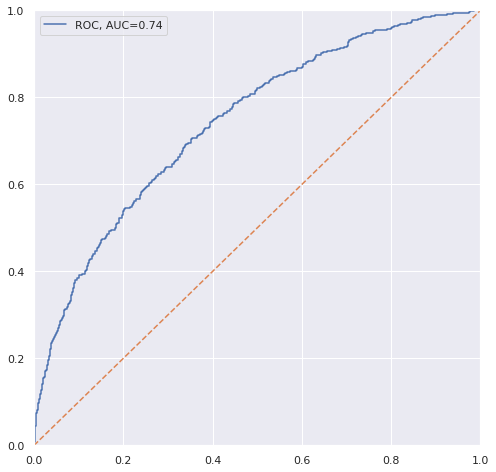

In [64]:
##训练模型
print("开始训练模型......")
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(tfidf_words_df.iloc[:30000,:], dianping['y'].iloc[:30000])  ## 训练模型
LR.coef_
print("模型训练完成......")
## 预测及概率
dianping['prob']=LR.predict_proba(tfidf_words_df)[:,1]
dianping['pred']=dianping['prob']>=0.5
# 画图
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(dianping['y'][30000:], dianping['prob'][30000:])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

当然，以上模型没有进行调参，模型仍有改进的空间。